In [108]:
import openweathermapy.core as owm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json
from config import api_key


In [30]:
settings = {'APPID':api_key,'units':'metric'}

In [34]:
location = "Charlotte"
data = owm.get_current(location, **settings)
print()

{'APPID': 'b8bfdf1351f87c699ce353004a304a6f', 'units': 'metric'}


In [81]:
#Create lists of latitudes and longitudes at different points around the globe

lats = [-90]
x=-90
for i in range(20):
    x=x+9
    lats.append(x)
print(lats)
lngs = [-180]
y=-180
for j in range(24):
    y=round(y+360/24)
    lngs.append(y)
print(lngs)
cos = np.cos(lats)
print(np.absolute(cos))
for lat in lats:
    for lng in lngs:
        a = np.absolute(lng)
        b = np.absolute(lng)-cos
        if a > b:
            print(lng)
        else:
            continue

[-90, -81, -72, -63, -54, -45, -36, -27, -18, -9, 0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90]
[-180, -165, -150, -135, -120, -105, -90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180]
[0.44807362 0.77668598 0.96725059 0.98589658 0.82930983 0.52532199
 0.12796369 0.29213881 0.66031671 0.91113026 1.         0.91113026
 0.66031671 0.29213881 0.12796369 0.52532199 0.82930983 0.98589658
 0.96725059 0.77668598 0.44807362]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [39]:
# # Create loop so that as lat gets closer to 0, the number of loops through lngs increases.
# data_dict = []
# #use lats and lngs to pull jsons for all the cities.
# for lat in lats:
#     for lng in lngs:
          if np.absolute(lng) > np.absolute(lng)+cos
#         location = (lat, lng)
#         data = owm.get_current(location, **settings)
#         data_dict.append(data)
          else:
            continue
# print(data_dict)

[{'coord': {'lon': -180, 'lat': -90}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -46.51, 'pressure': 707.94, 'humidity': 0, 'temp_min': -46.51, 'temp_max': -46.51, 'sea_level': 1051.94, 'grnd_level': 707.94}, 'wind': {'speed': 4.81, 'deg': 243.005}, 'clouds': {'all': 24}, 'dt': 1522198322, 'sys': {'message': 0.0137, 'sunrise': 0, 'sunset': 0}, 'id': 0, 'name': '', 'cod': 200}, {'coord': {'lon': -166, 'lat': -90}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -46.51, 'pressure': 707.94, 'humidity': 0, 'temp_min': -46.51, 'temp_max': -46.51, 'sea_level': 1051.94, 'grnd_level': 707.94}, 'wind': {'speed': 4.76, 'deg': 229.005}, 'clouds': {'all': 24}, 'dt': 1522198322, 'sys': {'message': 0.0128, 'sunrise': 0, 'sunset': 0}, 'id': 0, 'name': '', 'cod': 200}, {'coord': {'lon': -152, 'lat': -90}, 'weather': [{'id': 701, 'main': 'Mist', 

In [53]:
#Merge each json into one large dictionary and loop through keys.
print(len(data_dict))

546


In [89]:
print(data_dict[0])

{'coord': {'lon': -180, 'lat': -90}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -46.51, 'pressure': 707.94, 'humidity': 0, 'temp_min': -46.51, 'temp_max': -46.51, 'sea_level': 1051.94, 'grnd_level': 707.94}, 'wind': {'speed': 4.81, 'deg': 243.005}, 'clouds': {'all': 24}, 'dt': 1522198322, 'sys': {'message': 0.0137, 'sunrise': 0, 'sunset': 0}, 'id': 0, 'name': '', 'cod': 200}


In [119]:
x_axis = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
weather_df = pd.DataFrame(columns = {"lat","lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"})
for i in range(len(data_dict)):
    x_axis.append(data_dict[i]['coord']['lat'])
    temp.append(data_dict[i]['main']['temp_max'])
    humidity.append(data_dict[i]['main']['humidity'])
    cloudiness.append(data_dict[i]['clouds']['all'])
    wind_speed.append(data_dict[i]['wind']['speed'])
    date.append(data_dict[i]['dt'])

In [120]:
weather_df["lat"] = x_axis
weather_df["Max Temp"] = temp
weather_df["Humidity"] = humidity
weather_df["Cloudiness"] = cloudiness
weather_df["Wind Speed"] = wind_speed
weather_df["Date"] = date
weather_df.head()

,Date,Humidity,lng,lat,Wind Speed,Max Temp,Cloudiness
0,1522198322,0,NaN,-90,4.81,-46.51,24
1,1522198322,0,NaN,-90,4.76,-46.51,24
2,1522194600,0,NaN,-90,4.60,-50.00,75
3,1522198564,0,NaN,-90,4.66,-46.51,24
4,1522198565,0,NaN,-90,4.56,-46.51,24


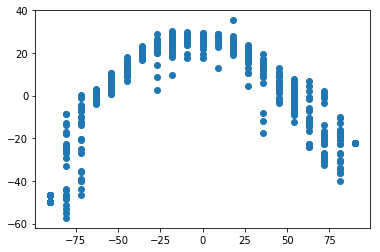

In [121]:
plt.scatter(x_axis, temp)

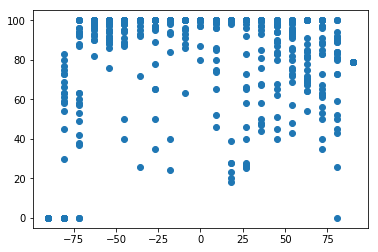

In [111]:
plt.scatter(x_axis, humidity)

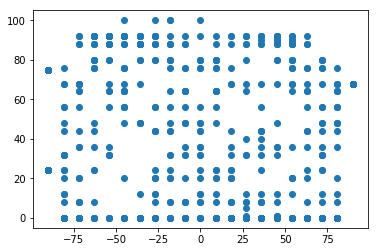

In [112]:
plt.scatter(x_axis, cloudiness)

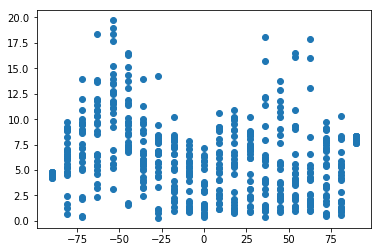

In [113]:
plt.scatter(x_axis, wind_speed)